In [1]:
%matplotlib inline
from datacube import Datacube
import datacube

import pandas as pd
from odc.ui import DcViewer

# Set some configurations for displaying tables nicely
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", None)

In [2]:
import numpy as np

In [3]:
dc = datacube.Datacube(app="03_Products_and_measurements")

In [4]:
products = dc.list_products()
products

,name,description,license,default_crs,default_resolution
name,,,,,
aster_aloh_group_composition,aster_aloh_group_composition,ASTER,None,None,None
aster_aloh_group_content,aster_aloh_group_content,ASTER,None,None,None
aster_false_colour,aster_false_colour,ASTER,None,None,None
aster_feoh_group_content,aster_feoh_group_content,ASTER,None,None,None
aster_ferric_oxide_composition,aster_ferric_oxide_composition,ASTER,None,None,None
aster_ferric_oxide_content,aster_ferric_oxide_content,ASTER,None,None,None
aster_ferrous_iron_content_in_mgoh,aster_ferrous_iron_content_in_mgoh,ASTER,None,None,None
aster_ferrous_iron_index,aster_ferrous_iron_index,ASTER,None,None,None
aster_green_vegetation,aster_green_vegetation,ASTER,None,None,None


In [5]:
dc_measurements = dc.list_measurements()
dc_measurements.loc[['s1_gamma0_geotif_scene']]

name    dtype units nodata aliases  \
product                measurement                                      
s1_gamma0_geotif_scene vh            vh  float32    DN      0     NaN   
                       vv            vv  float32    DN      0     NaN   

                                   flags_definition  
product                measurement                   
s1_gamma0_geotif_scene vh                       NaN  
                       vv                       NaN

In [11]:
query = {
'y': (-35.69, -35.744), 
'x': (150.09, 150.169),
'time':('2016-01-01','2018-12-01'),
'crs': 'EPSG:4326',
'output_crs': 'EPSG: 3577',
'resolution': (30, -30)
}

In [12]:
dss = dc.find_datasets(product='s1_gamma0_geotif_scene', **query)
len(dss)

27

In [13]:

radar = dc.load(product='s1_gamma0_geotif_scene', **query)

In [14]:
radar


<xarray.Dataset>
Dimensions:      (time: 27, y: 233, x: 265)
Coordinates:
  * time         (time) datetime64[ns] 2017-01-08T19:16:07.759542 ... 2017-12...
  * y            (y) float64 -4.021e+06 -4.021e+06 ... -4.014e+06 -4.014e+06
  * x            (x) float64 1.638e+06 1.638e+06 1.637e+06 ... 1.63e+06 1.63e+06
    spatial_ref  int32 3577
Data variables:
    vh           (time, y, x) float32 0.04087 0.02078 ... 0.03654 0.03626
    vv           (time, y, x) float32 0.09926 0.1803 0.03274 ... 0.1044 0.2205
Attributes:
    crs:           EPSG: 3577
    grid_mapping:  spatial_ref

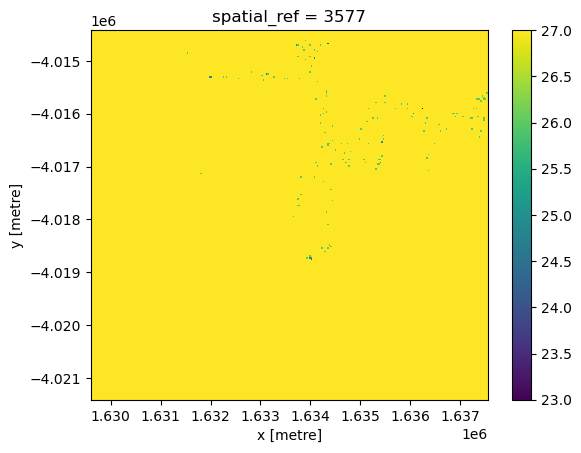

In [15]:
zeroish = 1e-4
nodata = (radar.vv <= zeroish) & (radar.vh <= zeroish)
clean = radar.copy(deep=True)
clean.vv.values[nodata.values] = np.nan
clean.vh.values[nodata.values] = np.nan
count = (~nodata).sum(dim='time')
count.plot()

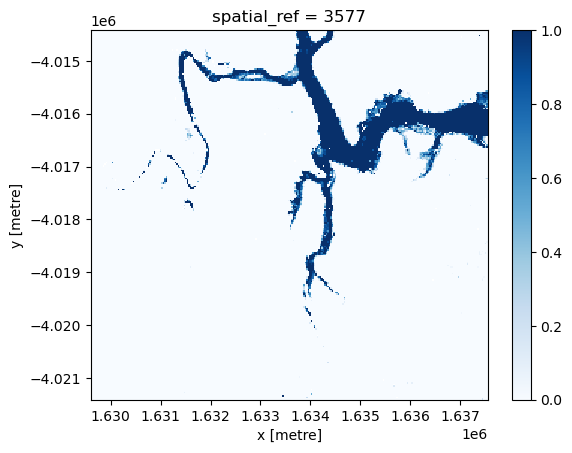

In [16]:
water = (clean.vv + clean.vh) < 0.008
dry = (clean.vv + clean.vh) > 0.1
unsure = ~water & ~dry

water = water + 0.0 # cast boolean to float
water.values[nodata.values] = np.nan
water.values[unsure.values] = np.nan
water.mean(dim='time').plot(cmap='Blues', vmin=0., vmax=1.)
water_unsure= water.mean(dim='time').copy()

In [17]:
water=water.to_dataset('wofs')
dataset_to_output =  water.assign_attrs(radar.attrs)
datacube.storage.storage.write_dataset_to_netcdf(dataset_to_output, 's1_water_exclude_unsure.nc')

TypeError: wofs is not a dim. If supplying a ``name``, pass as a kwarg.

In [ ]:
t1=0.01
t2=0.04
watermask = (clean.vv + clean.vh) < t1
drymask = (clean.vv + clean.vh) > t2

water = 1.-((clean.vv + clean.vh)-t1)/(t2-t1)
water.values[nodata.values] = np.nan
water.values[watermask.values]=1.
water.values[drymask.values]=0.
water.mean(dim='time').plot(cmap='Blues', vmin=0, vmax=1)
water_prob=water.mean(dim='time').copy()

In [ ]:
water=water.to_dataset('wofs')
dataset_to_output =  water.assign_attrs(radar.attrs)
datacube.storage.storage.write_dataset_to_netcdf(dataset_to_output, 's1_water_prob.nc')

In [ ]:
wofs.isel(time=0).frequency.plot(cmap='Blues', vmin=0, vmax=1)

In [ ]:
wofs_freq=wofs.isel(time=0).frequency.copy()

In [ ]:
wofs_freq=wofs_freq.where(wofs_freq>=0)

In [ ]:
(water_unsure-wofs_freq).plot()

In [ ]:
(water_prob-wofs_freq).plot()